In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [19]:
import cv2

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential 

In [7]:
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D,Dropout, BatchNormalization

In [8]:
from tensorflow.keras.datasets import cifar10

In [9]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_test.shape, y_train.shape

((10000, 1), (50000, 1))

In [15]:
names = ["Airplane", "Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

In [16]:
names

['Airplane',
 'Automobile',
 'Bird',
 'Cat',
 'Deer',
 'Dog',
 'Frog',
 'Horse',
 'Ship',
 'Truck']

In [17]:
X_train[3000]

array([[[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 251, 251],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [250, 250, 250]],

       [[251, 251, 251],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [251, 251, 251],
        [252, 252, 252],
        [251, 251, 251]],

       ...,

       [[149, 149, 149],
        [ 62,  62,  62],
        [ 65,  65,  65],
        ...,
        [207, 200, 190],
        [202, 192, 182],
        [214, 207, 200]],

       [[159, 159, 159],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [199, 180, 158],
        [202, 191, 180],
        [212, 207, 203]],

       [[224, 224, 224],
        [194, 194, 194],
        [182, 182, 182],
        ...,
        [214, 201, 185],
        [215, 208, 200],
        [217, 215, 213]]

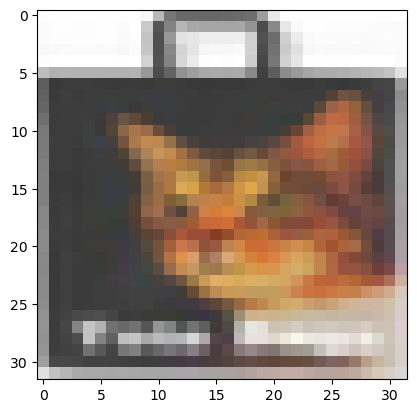

In [18]:
plt.imshow(X_train[3000])

In [20]:
y_train[3000]

array([3], dtype=uint8)

In [21]:
names[3]

'Cat'

In [22]:
X_test[2500]

array([[[137, 163,  75],
        [158, 182, 103],
        [182, 206, 129],
        ...,
        [175, 187, 102],
        [189, 203, 103],
        [162, 174,  86]],

       [[122, 138,  92],
        [126, 140, 109],
        [134, 148, 111],
        ...,
        [135, 153,  84],
        [143, 162,  85],
        [125, 143,  73]],

       [[134, 158,  79],
        [123, 145,  80],
        [142, 163, 103],
        ...,
        [126, 145,  84],
        [113, 131,  71],
        [115, 133,  74]],

       ...,

       [[ 70,  52,  57],
        [ 81,  60,  66],
        [ 85,  63,  65],
        ...,
        [200, 214, 103],
        [150, 154,  96],
        [ 97,  99,  70]],

       [[106,  83,  84],
        [121,  95,  97],
        [124,  94,  99],
        ...,
        [142, 148,  80],
        [109, 116,  65],
        [108, 118,  65]],

       [[117,  95,  90],
        [115,  90,  86],
        [111,  81,  88],
        ...,
        [113, 119,  79],
        [ 96, 113,  63],
        [149, 173,  98]]

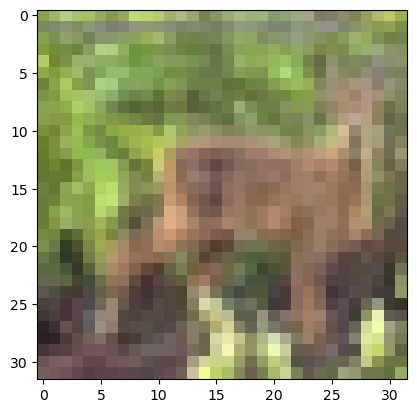

In [23]:
plt.imshow(X_test[2500])

In [24]:
y_test[2500]

array([4], dtype=uint8)

In [25]:
names[4]

'Deer'

In [26]:
X_test[5500]

array([[[129, 164, 191],
        [122, 158, 187],
        [125, 158, 183],
        ...,
        [132, 165, 188],
        [135, 162, 178],
        [145, 161, 172]],

       [[134, 164, 189],
        [129, 158, 181],
        [123, 145, 162],
        ...,
        [139, 166, 187],
        [146, 169, 185],
        [153, 170, 184]],

       [[132, 167, 194],
        [133, 166, 192],
        [119, 145, 165],
        ...,
        [156, 167, 185],
        [162, 166, 183],
        [171, 171, 185]],

       ...,

       [[ 68,  69,  72],
        [ 71,  71,  71],
        [ 63,  62,  53],
        ...,
        [ 96,  92,  90],
        [ 99,  98,  96],
        [104, 103, 101]],

       [[ 67,  68,  73],
        [ 69,  69,  71],
        [ 63,  61,  54],
        ...,
        [ 86,  83,  80],
        [ 93,  92,  89],
        [ 99,  98,  94]],

       [[ 66,  67,  73],
        [ 65,  64,  68],
        [ 58,  56,  51],
        ...,
        [ 82,  81,  76],
        [ 83,  82,  76],
        [ 88,  88,  82]]

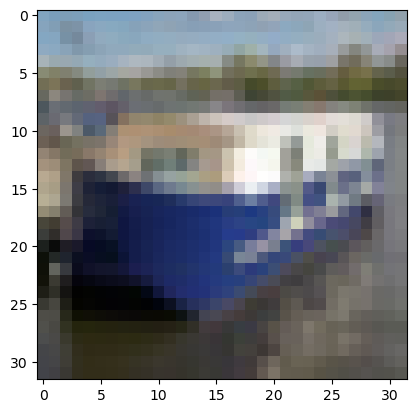

In [28]:
plt.imshow(X_test[5500])

In [29]:
y_test[5500]

array([8], dtype=uint8)

In [30]:
names[8]

'Ship'

### Scaling

In [31]:
X_train_scale = X_train/250.0

In [32]:
X_test_scale = X_test/250.0

In [33]:
X_train.max()

255

In [34]:
X_train.min()


0

In [35]:
X_train_scale.max()

1.02

In [36]:
X_test_scale.min()

0.0

In [37]:
X_test.max(), X_test_scale.max()

(255, 1.02)

In [39]:
X_test_scale.min(),X_test.min()

(0.0, 0)

### Model Building

In [42]:
import warnings

In [43]:
warnings.filterwarnings("ignore")

In [52]:
seq_model = Sequential()

In [53]:
seq_model.add(Conv2D(64,(3,3),strides=(1,1), padding = "valid", activation = "relu",input_shape =(32,32,3)))
seq_model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))
seq_model.add(Dropout(0.20))

In [54]:
seq_model.add(Conv2D(128,(3,3), strides=(1,1), padding ="valid", activation="relu"))
seq_model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))
seq_model.add(Dropout(0.20))

In [55]:
seq_model.add(Conv2D(256,(3,3), strides=(1,1), padding ="valid", activation="relu"))
seq_model.add(MaxPooling2D(pool_size=(2,2), padding="valid"))
seq_model.add(Dropout(0.20))

In [56]:
seq_model.add(Flatten() )

In [57]:
seq_model.add(Dense(512, activation= "relu") )

In [58]:
seq_model.add(Dense(1024, activation= "relu") )

In [59]:
seq_model.add(Dense(10, activation= "softmax") )

In [60]:
seq_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,431,178 (5.46 MB)

 Trainable params: 1,431,178 (5.46 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
seq_model.compile( optimizer = "adam",
                 loss = "sparse_categorical_crossentropy",
                 metrics = ["accuracy"])

In [69]:
seq_model

<Sequential name=sequential_3, built=True>

In [70]:
seq_model.fit(X_train_scale,y_train, epochs = 20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 101ms/step - accuracy: 0.3207 - loss: 1.8105
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.5595 - loss: 1.2384
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 207s 133ms/step - accuracy: 0.6658 - loss: 0.9526
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 110ms/step - accuracy: 0.6833 - loss: 0.8898
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 110ms/step - accuracy: 0.7057 - loss: 0.8282
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 120ms/step - accuracy: 0.7258 - loss: 0.7710
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 116ms/step - accuracy: 0.7386 - loss: 0.7369
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 102ms/step - accuracy: 0.7518 - loss: 0.6987
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 105ms/step - accuracy: 0.7600 - loss: 0.6732
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 169s 108ms/step - accuracy: 0.7681 - loss: 0.6540
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 169s 108ms/step - accuracy: 0.7787 

In [71]:
seq_model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4954 - loss: 196.9214


[197.08648681640625, 0.49540001153945923]